# Campaign group data

In [78]:
import pandas as pd
import numpy as np

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [80]:
import shap
shap.initjs()

In [81]:
data = pd.read_csv('campaign_data.csv', low_memory=False)

In [82]:
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y,test_control_flag,was_contacted
0,37,services,married,high.school,no,yes,no,telephone,5,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,0,campaign group,0
1,56,services,married,high.school,no,no,yes,telephone,5,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,0,campaign group,0
2,41,blue-collar,married,unknown,unknown,no,no,telephone,5,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,1,campaign group,0
3,25,services,single,high.school,no,yes,no,telephone,5,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,0,campaign group,0
4,25,services,single,high.school,no,yes,no,telephone,5,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,0,campaign group,0


In [83]:
data.dtypes

age                    int64
job                   object
marital               object
education             object
default               object
housing               object
loan                  object
contact               object
month                  int64
day_of_week           object
duration             float64
campaign             float64
pdays                  int64
previous               int64
poutcome              object
emp.var.rate         float64
cons.price.idx       float64
cons.conf.idx        float64
y                      int64
test_control_flag     object
was_contacted          int64
dtype: object

In [84]:
# Convert all 'object' type columns to 'category'
object_columns = data.select_dtypes(include=['object']).columns
data[object_columns] = data[object_columns].astype('category')

In [85]:
cat_cols = ['was_contacted', 'y']
data[cat_cols] = data[cat_cols].astype('category')

In [86]:
data.dtypes

age                     int64
job                  category
marital              category
education            category
default              category
housing              category
loan                 category
contact              category
month                   int64
day_of_week          category
duration              float64
campaign              float64
pdays                   int64
previous                int64
poutcome             category
emp.var.rate          float64
cons.price.idx        float64
cons.conf.idx         float64
y                    category
test_control_flag    category
was_contacted        category
dtype: object

In [87]:
cat_var = data.select_dtypes(include=['category']).columns.tolist()
con_var = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

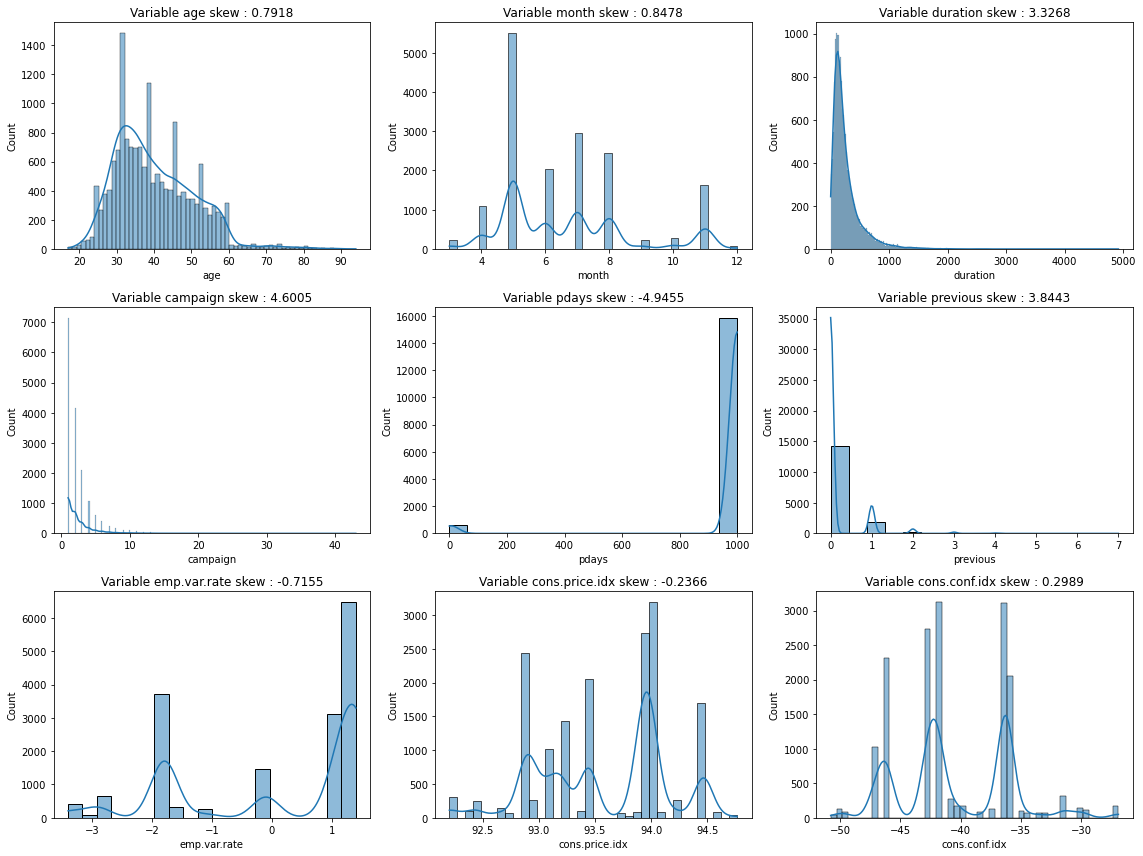

In [93]:
def con_plot(var):
    fig, ax = plt.subplots(int(np.ceil(len(con_var)/3)), 3, figsize=(16,12))
    ax = ax.flatten()
    i = 0
    for col in var:
        skew = data[col].skew()
        sns.histplot(data[col], kde=True, ax=ax[i])  # Use histplot
        ax[i].set_title("Variable %s skew : %.4f"%(col, skew))
        i += 1
    plt.tight_layout()
    plt.show()

con_plot(con_var)


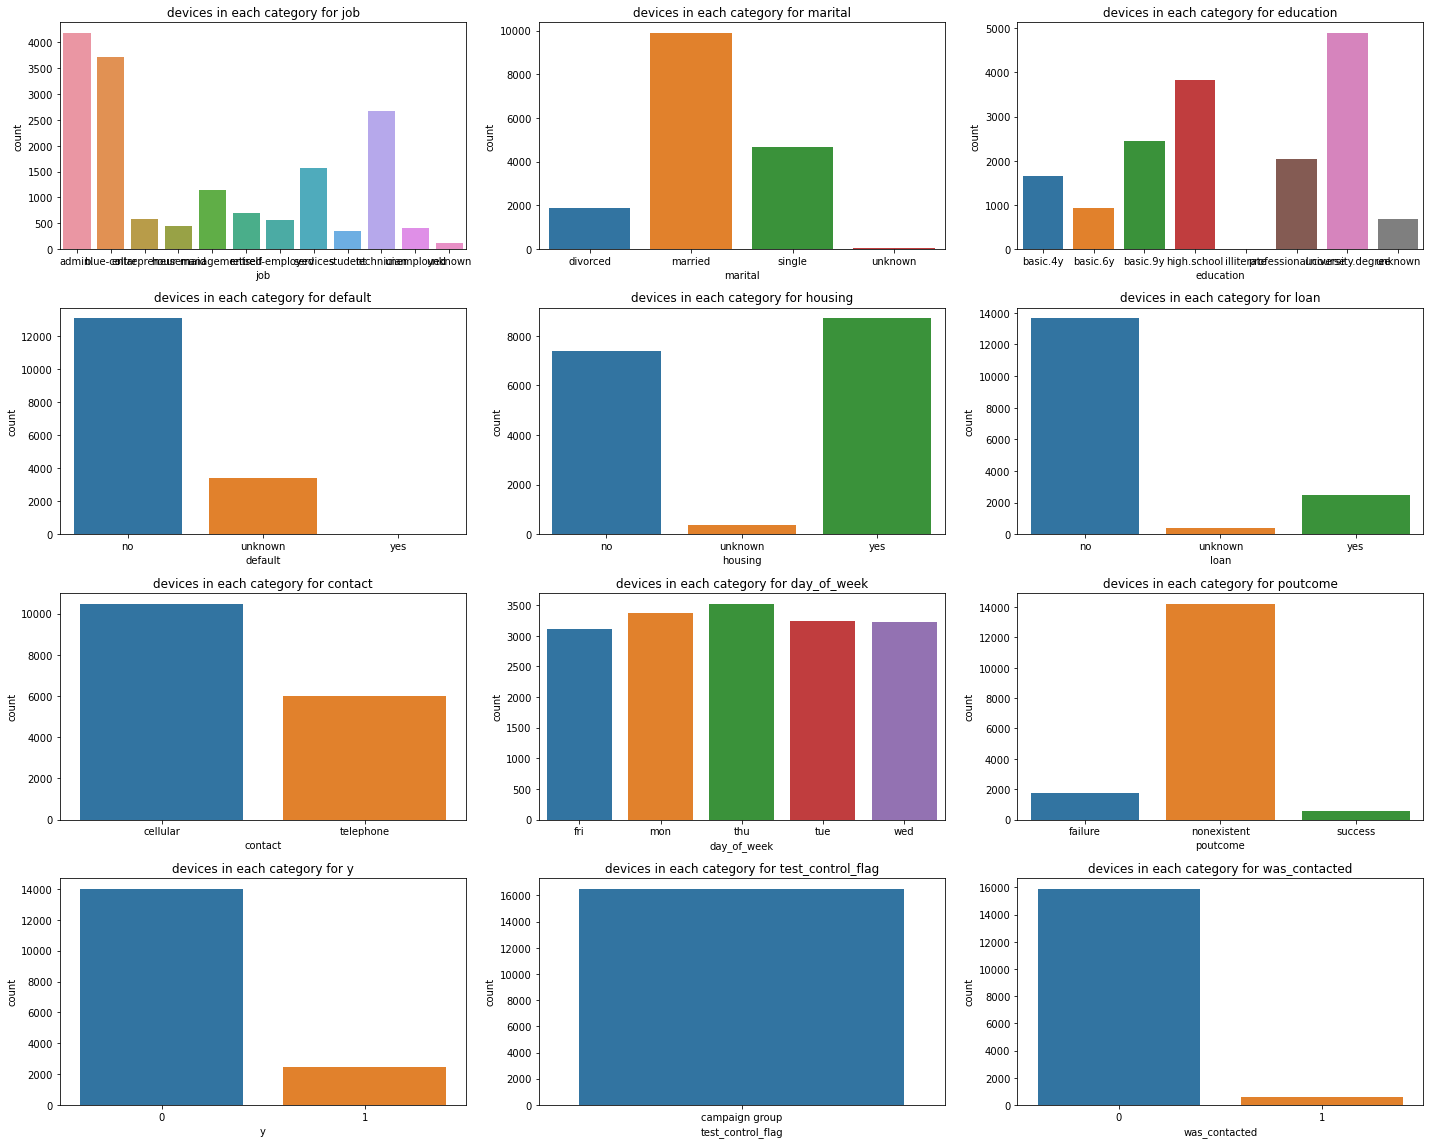

In [91]:
def cat_plot(var):
    fig, ax = plt.subplots(int(np.ceil(len(var)/3)), 3, figsize=(20,16))
    ax = ax.flatten()
    i = 0
    for col in var:
        sns.countplot(data[col], ax=ax[i])
        ax[i].set_title("devices in each category for %s"%(col))
        i+=1
    plt.tight_layout()
    plt.show()
    
cat_plot(cat_var)

# 2. Preparing data for algorithm

In [52]:
category_columns = data.select_dtypes(include=['category']).columns.tolist()

In [53]:
category_columns.remove('y')

In [54]:
category_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'day_of_week',
 'poutcome',
 'test_control_flag',
 'was_contacted']

In [55]:
prepared_data = pd.get_dummies(data, columns = category_columns)

In [56]:
prepared_data.shape

(16476, 56)

In [57]:
prepared_data.columns

Index(['age', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'pout

In [58]:
prepared_data = prepared_data.drop(columns = ['job_unknown', 'marital_unknown', 'education_unknown', 'default_unknown', \
                                  'housing_unknown', 'loan_unknown', 'poutcome_nonexistent'])

In [59]:
prepared_data.columns

Index(['age', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'day_of_week_fri', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_failure', 'poutcome_success',
       'test_control_flag_campaign group', 'was_contacted_0',
       'was_contacted_1'],
      dtype='object

In [60]:
all_columns = prepared_data.columns.tolist()

In [61]:
all_columns.remove('y')

In [62]:
all_columns

['age',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'default_no',
 'default_yes',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_failure',
 'poutcome_success',
 'test_control_flag_campaign group',
 'was_contacted_0',
 'was_contacted_1']

### 3. Train & test split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X = prepared_data[all_columns]

In [65]:
y = prepared_data['y']

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

## Create a logistic regression model

In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=10000)  # Increase max_iter value?

**lbfgs** stands for: "Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm". It is one of the solvers' algorithms provided by Scikit-Learn Library.

The term limited-memory simply means it stores only a few vectors that represent the gradients approximation implicitly.

It has better convergence on relatively small datasets.

In [68]:
# other solvers: saga, sag, lbfgs

In [69]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

### Predict test data

In [70]:
y_pred = model.predict(X_test)

In [94]:
print("Predicted value: ", y_pred[:10])
print("Actual value: ", y_test[:10])

Predicted value:  [0 0 0 0 0 0 0 0 0 0]
Actual value:  8633     0
9406     0
13794    0
663      1
1894     0
1373     0
12703    0
12573    0
7133     0
5548     1
Name: y, dtype: category
Categories (2, int64): [0, 1]


In [95]:
from sklearn.metrics import accuracy_score
accuracy_log_reg = accuracy_score(y_pred = y_pred, y_true = y_test)
print(f'Accuracy of the model Logistic Regression is {accuracy_log_reg*100:.2f}%')

Accuracy of the model Logistic Regression is 86.60%


# Feature importance

<AxesSubplot:ylabel='Feature'>

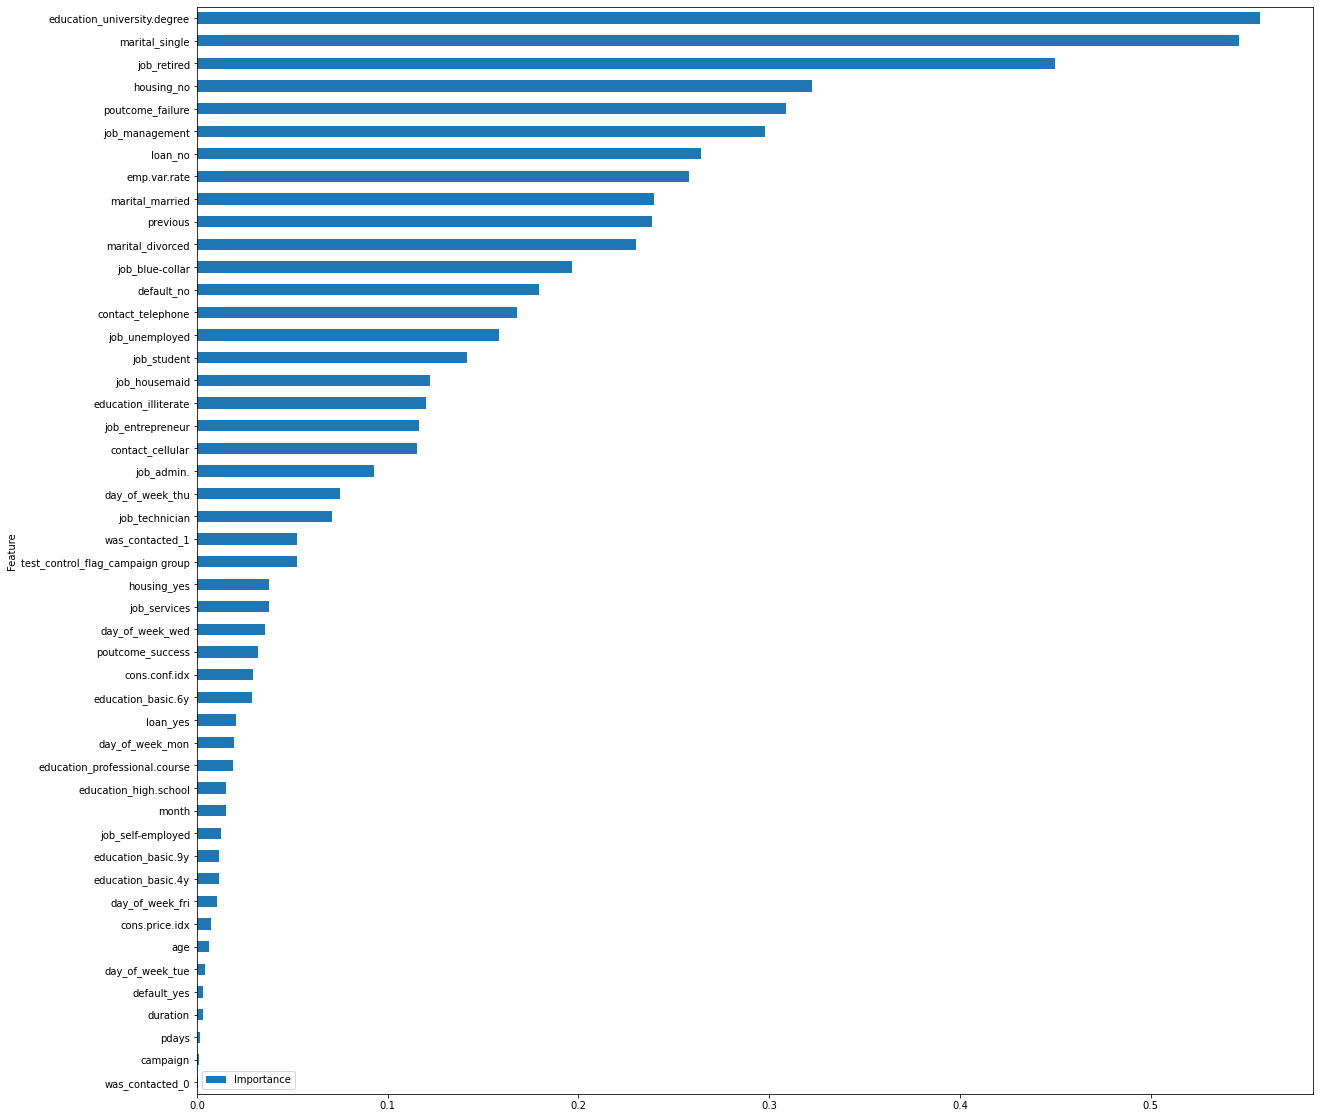

In [73]:
coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(20, 20))

### ROC

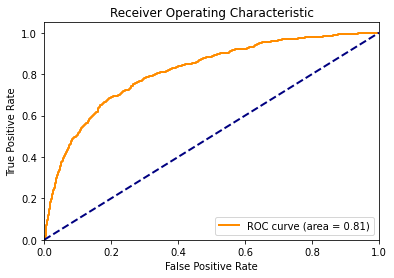

AUC: 0.8141732088461825


In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import roc_auc_score

y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)

print("AUC:", auc)

### AUC

- AUC around 0.5: This suggests that the model's predictions are not much better than random guessing. It might mean that the model is not performing well.
- AUC above 0.7: This is considered decent and indicates that the model has some ability to discriminate between the classes. It suggests that the model is performing better than random guessing.
- AUC above 0.8: This is generally considered to be good performance. The model is distinguishing between the classes quite well.
- AUC above 0.9: This indicates excellent performance. The model is making highly accurate predictions.

## Explainable AI - SHAP values

In [34]:
explainer = shap.Explainer(model, X_train)
# Explain individual predictions
shap_values = explainer(X)

### Waterfall plot

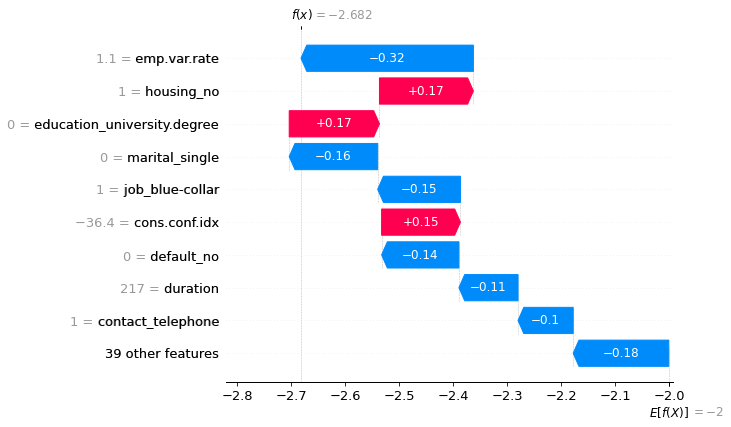

In [35]:
# Index of the instance you want to explain
instance_idx = 2

# Create a summary plot (waterfall plot) for the instance
shap.plots.waterfall(shap_values[instance_idx], max_display=10)

In [36]:
shap.plots.force(shap_values[0:100])

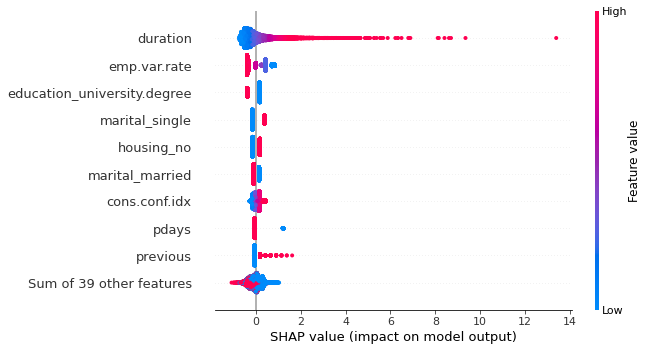

In [37]:
shap.plots.beeswarm(shap_values)

## Other models

### XGBoost

In [39]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [40]:
# Create XGBoost classifier
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [42]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the XGBoost model is: {accuracy*100:.2f}%')

Accuracy of the XGBoost model is: 86.60%


## Random Forest clasiffier

In [83]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfcpredictions = rfc.predict(X_test)
print("Predicted value: ", rfcpredictions[:10])
print("Actual value: ", y_test[:10])

Predicted value:  [0 0 0 0 0 0 0 0 1 0]
Actual value:  7277     0
19357    0
27845    0
10017    0
24185    0
24116    0
17556    0
31296    0
40660    1
12239    0
Name: y, dtype: category
Categories (2, int64): [0, 1]


In [84]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred = rfcpredictions, y_true = y_test)
print(f'Accuracy of the Random Forest Classifier model is {accuracy*100:.2f}%')

Accuracy of the Random Forest Classifier model is 86.11%


### SVC (support Vector Classifier)

In [85]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svcpredictions = svc.predict(X_test)
print("Predicted value: ", svcpredictions[:10])
print("Actual value: ", y_test[:10])

Predicted value:  [0 0 0 0 0 0 0 0 0 0]
Actual value:  7277     0
19357    0
27845    0
10017    0
24185    0
24116    0
17556    0
31296    0
40660    1
12239    0
Name: y, dtype: category
Categories (2, int64): [0, 1]


In [86]:
accuracy = accuracy_score(y_pred = svcpredictions, y_true = y_test)
print(f'Accuracy of the SVC model is {accuracy*100:.2f}%')

Accuracy of the SVC model is 88.25%


### Decision Tree Classifier

In [87]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
dtcprediction = dtc.predict(X_test)
print("Predicted value: ", dtcprediction[:10])
print("Actual value: ", y_test[:10])

Predicted value:  [0 0 0 0 0 0 0 0 1 0]
Actual value:  7277     0
19357    0
27845    0
10017    0
24185    0
24116    0
17556    0
31296    0
40660    1
12239    0
Name: y, dtype: category
Categories (2, int64): [0, 1]


In [88]:
accuracy = accuracy_score(y_pred = dtcprediction, y_true = y_test)
print(f'Accuracy of the Decision Tree Classifier model is {accuracy*100:.2f}%')

Accuracy of the Decision Tree Classifier model is 82.69%
